# Introductory applied machine learning (INFR10069)

# Assignment 1: Data analysis and visualisation

## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

## Mechanics

You should produce a Jupyter notebook in answer to this assignment.
**You need to submit this notebook electronically as described below.**

Place your notebook in a directory called `iamlans` and submit this directory using the submit command on a DICE machine. The format is:

`submit iaml 1 iamlans`

You can check the status of your submissions with the `show submissions` command.

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).


## Important Instructions

1. In the following questions you are asked to run experiments using Python (version 2.7) and the following packages:
    * Numpy
    * Pandas
    * Scikit-learn
    * Matplotlib
    * Seaborn

2. Before you start make sure you have set up a vitual environment (or conda environment if you are working on your own machine) and the required packages installed. Instructions on how to set-up the working enviornment and install the required packages can be found in `01_Lab_1_Introduction`.

3. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers.

4. The .csv files that you will be using are located at `./datasets` (the `datasets` directory is adjacent to this file).

5. **IMPORTANT:** Keep your answers brief and concise. Most questions can be answered with 2-3 lines of explanation (excluding coding questions).

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignemnt.

In [1]:
from __future__ import print_function, division
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sklearn
import seaborn as sns
%matplotlib inline

## Description of the dataset

This assignment is based on the 20 Newsgroups Dataset. This dataset is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware, comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale, soc.religion.christian). 

There are three versions of the 20 Newsgroups Dataset. In this assignment we will use the `bydate` matlab version in which documents are sorted by date into training (60%) and test (40%) sets, newsgroup-identifying headers are dropped and duplicates are removed. This collection comprises roughly 61,000 different words, which results in a bag-of-words representation with frequency counts. More specifically, each document is represented by a 61,000 dimensional vector that contains the counts for each of the 61,000 different words present in the respective document. 

To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We will use documents from only 5 out of the 20 newsgroups, which results in a 5-class problem. More specifically the 5 classes correspond to the following newsgroups: 
1. `alt.atheism`
2. `comp.sys.ibm.pc.hardware`
3. `comp.sys.mac.hardware`
4. `rec.sport.baseball`
5. `rec.sport.hockey `

However, note here that classes 2-3 and 4-5 are rather closely related. Additionally, we computed the [mutual information](https://en.wikipedia.org/wiki/Mutual_information) of each word with the class attribute and selected the 520 words out of 61,000 that had highest mutual information. Therefore, our dataset is a $N \times 520$ dimensional matrix, where $N$ is the number of documents. For very sophisticated technical reasons 1 was added to all the word counts in part A. The resulting representation is much more compact and can be used directly to perform our experiments in Python.

## 1. Exploration of the dataset [40%]

Your first task is to get a feel for the data that you will be dealing with in the rest of the assignment.

### ========== Question 1.1 ==========
Load the datasets `train_20news_partA.csv` and `train_20news_partB.csv` into two separate pandas DataFrames.

In [2]:
# Your code goes here
dataPathA = os.path.join(os.getcwd(), "datasets", "train_20news_partA.csv")
dataPathB = os.path.join(os.getcwd(), "datasets", "train_20news_partB.csv")
frameA = pd.read_csv(dataPathA, delimiter = ",")
frameB = pd.read_csv(dataPathB, delimiter = ",")

### ========== Question 1.2 ==========
Display basic information for dataset A such as number of columns, type, and memory usage (*hint: pandas dataframes have a built in method for this*) 

In [3]:
# Your code goes here
frameA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2129 entries, 0 to 2256
Columns: 521 entries, w1_aaa to class
dtypes: int64(521)
memory usage: 8.5 MB


### ========== Question 1.3 ==========
How many data points and how many attributes are there in the dataset that we can use to model the target variable `class`?

A: Disclaimer: The term "data points" is a bit confusing. Based on the language that you use in the rest of the assignment, I am assuming by "data point" you mean 1 article, so that the number of data points in a set would correspond to the number of rows in a Pandas DataFrame. The alternate interpretation, which was initially more intuitive to me was that 1 "data point" referred to a frequency of a word; in other words a specific value for a specific attribute in a specific article. If in fact it is this latter, alternate interpretation that you would prefer, I would simply multiply the answer that I will now refer to as the number of data points by the number of columns in the Pandas DataFrame.

There are 520 attributes. For each attribute there are 2256 data points (instances). 

(If using the alternate interpretation as explained above, the total number of datapoints in the data set that we could use to model the target variable "class" is 520 x 2256 = 133120 points.)

### ========== Question 1.4  ==========
Use a Pandas method to display the summary statistics for the `news_A` DataFrame.

In [4]:
# Your code goes here
frameA.describe()

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
count,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.00000,2129.000000,2129.000000,2129.000000,2129.000000,...,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000
mean,5.128229,6.097698,6.120244,5.551902,5.521841,6.12776,5.633161,6.090653,5.970409,5.624706,...,9.666510,9.217473,9.061531,9.398309,9.175200,9.708783,8.807891,9.719587,9.307656,3.092532
std,38.292577,46.190953,46.656022,40.953913,40.978098,45.96434,41.146918,45.762060,44.266628,40.769105,...,45.844064,43.948910,40.969185,43.833064,42.403283,47.294120,39.341038,46.185082,45.059367,1.395948
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,3.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,4.000000
max,572.000000,583.000000,579.000000,580.000000,591.000000,600.00000,546.000000,591.000000,578.000000,578.000000,...,590.000000,587.000000,577.000000,598.000000,568.000000,599.000000,585.000000,600.000000,597.000000,5.000000


### ========== Question 1.5 ==========
Display the first 7 instances of dataset A.

In [5]:
# Your code goes here
frameA.head(7)

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
0,1,1,1,1,1,1,1,1,1,1,...,1,5,3,6,8,4,6,4,8,4
1,1,1,1,1,1,1,1,1,1,1,...,2,3,6,8,3,4,5,6,5,4
2,1,1,1,1,1,1,1,1,1,2,...,4,2,6,5,2,5,5,7,8,2
3,1,1,1,1,1,1,1,1,1,1,...,6,3,6,1,1,8,1,8,4,3
4,1,1,1,1,1,1,1,1,1,1,...,6,1,7,8,6,3,1,8,4,3
5,1,1,1,1,1,1,1,1,1,1,...,7,5,4,5,5,7,7,7,2,2
6,1,1,1,1,2,1,1,1,1,1,...,3,6,8,8,3,5,2,1,2,1


### ========== Question 1.6 ==========
Display the names of the first 100 attributes in dataset A. 

You might observe that each attribute consists of two parts:
1. `w<x>_` (where x is an index corresponding to each word)
2. the actual name of the word

In [6]:
# Your code goes here
# Professor: I realize that there are ways to achieve this in one line
# For example: print (frameA.columns.values[:100])
# But I felt that this was the neatest way to display the data
for i in range (100):
    print (frameA.columns.values[i])

w1_aaa
w2_pins
w3_kmr
w4_notion
w5_queens
w6_dwyer
w7_defenseman
w8_gld
w9_tocchet
w10_home
w11_buying
w12_internet
w13_slots
w14_compatible
w15_transfer
w16_baltimore
w17_mean
w18_person
w19_performance
w20_support
w21_tor
w22_gm
w23_mouse
w24_base
w25_population
w26_bob
w27_set
w28_it
w29_earth
w30_faith
w31_steve
w32_caps
w33_printer
w34_east
w35_cable
w36_adapter
w37_mss
w38_catcher
w39_bullpen
w40_obp
w41_innocent
w42_european
w43_angeles
w44_settings
w45_words
w46_rit
w47_shots
w48_ports
w49_vga
w50_coverage
w51_jumpers
w52_bases
w53_sea
w54_pts
w55_behavior
w56_domi
w57_sabres
w58_yzerman
w59_messier
w60_goalies
w61_hawks
w62_our
w63_sx
w64_view
w65_hitters
w66_richard
w67_point
w68_nyi
w69_mvp
w70_kill
w71_nl
w72_field
w73_connector
w74_stars
w75_th
w76_install
w77_traded
w78_configuration
w79_standard
w80_rotation
w81_ultb
w82_sports
w83_pds
w84_canada
w85_did
w86_clock
w87_first
w88_switch
w89_tonight
w90_record
w91_singer
w92_majors
w93_royals
w94_does
w95_flames
w96_of
w97_

### ========== Question 1.7 ==========
Familiarise yourself with the [`stripplot`](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.stripplot.html) function in `seaborn`. Pick one attribute of your choice (except `class`) and display a stripplot for that attribute for dataset A. Demonstrate the distribution of the data separately for each class (by making appropriate use of the `x` argument in `stripplot`). Set the `jitter` argument to `True` and the `alpha` argument to an appropriate value (to add transparency). When the jitter parameter is enabled a small amount of noise is added to the data so that there is less overlap and the distribution is easier to visualise.

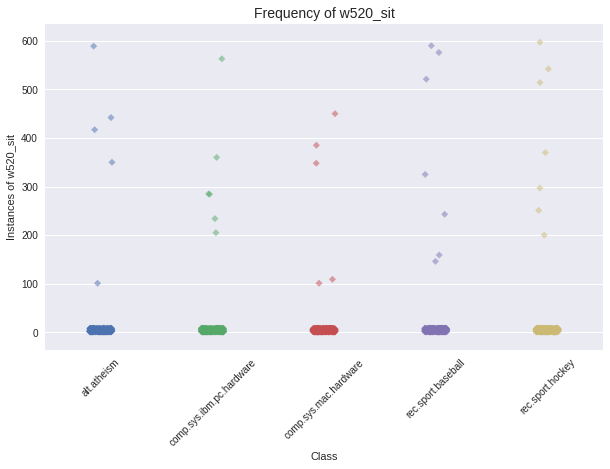

In [7]:
# Your code goes here
plt.figure(figsize = (10,6))
ax = sns.stripplot(x="class", y="w520_sit", data=frameA, jitter=True, marker="D", alpha = 0.5)
plt.title("Frequency of w520_sit", fontsize = 14)
plt.xlabel("Class")
plt.ylabel("Instances of w520_sit")
labels = ["alt.atheism", "comp.sys.ibm.pc.hardware", "comp.sys.mac.hardware", \
          "rec.sport.baseball", "rec.sport.hockey"]
ax.set_xticklabels(labels, rotation=45)
plt.show()

### ========== Question 1.8 ==========
The stripplot illustrates the distribution of a single attribute. We can also visualise the joint distribution of two variables by using a scatter plot. Again, we want to add a bit of noise into the data so that is easier to see which parts of the space (2-dimensional in our case) have larger probability densities. 

For this, you will be using the function `scatter_jitter` provided below. This function takes as input two numpy arrays containing the features of interest. Pick two attributes of your choice from dataset A and use the provided function to plot their joint distribution. You can play around with the amount of noise added by tweaking the `jitter` parameter. Alternatively, you can just use its default value which is set to 0.2.

In [8]:
def scatter_jitter(arr1, arr2, jitter=0.2):
    """ Plots a joint scatter plot of two arrays by adding small noise to each example. 
    Noise is proportional to variance in each dimension. """
    arr1 = np.asarray(arr1)
    arr2 = np.asarray(arr2)
    arr1 = arr1 + jitter*arr1.std(axis=0)*np.random.standard_normal(arr1.shape)
    arr2 = arr2 + jitter*arr2.std(axis=0)*np.random.standard_normal(arr2.shape)
    plt.scatter(arr1, arr2, marker=4)

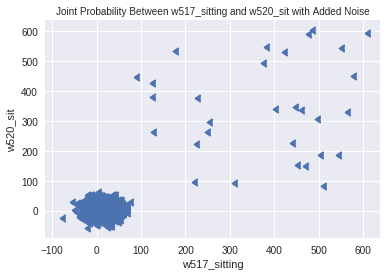

In [9]:
# Your code goes here
scatter_jitter(frameA["w517_sitting"], frameA["w520_sit"], jitter=0.4)
plt.title("Joint Probability Between w517_sitting and w520_sit with Added Noise", fontsize = 10)
plt.xlabel("w517_sitting")
plt.ylabel("w520_sit")
plt.show()

### ========== Question 1.9 ==========
From the strip and scatter plots above you might observe that there is something peculiar about the data. Indeed most attributes take very small values (usually in the range 1-10) but there are some data points (i.e. rows) in the dataset where the attributes take very large values. These data points are called [outliers](https://en.wikipedia.org/wiki/Outlier).

You might think that the presence of outliers in the dataset has been a resut of noise contamination (you wouldn't expect the same word to appear 600 times within an e-mail, would you?). Your job now is to create a new dataset from dataset A (name it `news_A_clean`) and remove the outliers. Create some metric to find the outliers and check that your metric is reasonable. Be careful not to alter the original `news_A`...we may require it in its dirty format later...

In [10]:
# Your code goes here
"""
Algorithm:
For each column:
1) Calculate median frequency
   Use median instead of mean because dataset causes mean to be heavily skewed
2) Calculate standard deviation of frequency
3) If an instance (i.e. article) shows a value for any attribute that is greater than
   3 standard deviations away from the median, assume the instance is an outlier and mark it as so
4) Also mark an instance as outlier if any attribute has a value <1 (indicating a negative frequency)
5) Drop (remove) all marked rows
"""
# Create new DataFrame
news_A_clean = frameA.copy()
# Initialize columns to mark outliers
news_A_clean["is_outlier"] = 0

# Mark outliers
for column in news_A_clean:
    # Stop loop before outlier marker column
    if column == "is_outlier":
        break
    # Calculate mean and standard deviation for each row
    stDevA = news_A_clean[column].std()
    medianA = news_A_clean[column].median()
    # Iterate through rows in column and mark "is_outlier" column accordingly
    for i in range(len(news_A_clean[column])):
        if (news_A_clean[column].iloc[i] > 3*stDevA + medianA) or (news_A_clean[column].iloc[i] < 1):
            news_A_clean["is_outlier"].iloc[i] = 1
# Remove outliers
news_A_clean = news_A_clean[news_A_clean["is_outlier"] < 1]
news_A_clean = news_A_clean.drop("is_outlier", axis=1, inplace=False)

### ========== Question 1.10 ==========
Write code to return the number of data points in the clean dataset, and the number of documents that have been excluded as outliers

In [11]:
# Your code goes here
print ("Number of data points in clean data set:", len(news_A_clean["w1_aaa"]))
print ("Number of data points excluded:", len(frameA["w1_aaa"]) - len(news_A_clean["w1_aaa"]))

Number of data points in clean data set: 2094
Number of data points excluded: 35


## 2. Naive Bayes classification [60%]
Now we want to fit a Gaussian Naive Bayes model to the cleaned dataset A. You might want first to familiarise yourself with the [`GaussianNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) class in `Sklearn`.

### ========== Question 2.1 ==========

By using the `scatter_jitter` function provided above, display a scatter plot of the features `w281_ico` and `w273_tek` for the cleaned dataset A. Set the jitter value to something small (e.g. 0.1). Label axes appropriately.

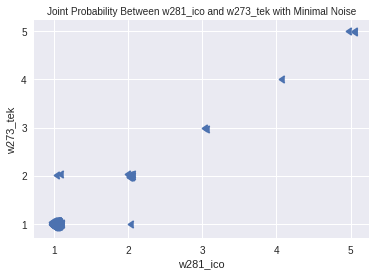

In [12]:
# Your code goes here
scatter_jitter(news_A_clean["w281_ico"], news_A_clean["w273_tek"], jitter=0.1)
plt.title("Joint Probability Between w281_ico and w273_tek with Minimal Noise", fontsize = 10)
plt.xlabel("w281_ico")
plt.ylabel("w273_tek")
plt.show()

### ========== Question 2.2 ==========
What do you observe? 

How does that relate to the Naive Bayes assumption? 

What would be the main issue we would have to face if we didn't make this assumption?

A: For both variables the mean is centered around 1. With the exception of a few data points, there appears to be a directly linear relationship between the two variables, i.e. a correlation of very nearly +1. This means that the two variables, and likely other groups of attributes in the dataset, are not independent of each other. In other words, a high probability of one vocabulary term suggests a high probability of another set of vocabulary terms. This linear depenedence a problem because development of the Naive Bayes classifier relies on an assumption of independent attributes. If the Naive Bayes classifier did not make this assumption, there would be two main problems: 1. computational requirements and 2. the fact that our relatively small dataset compared to the number of attributes would result in an overfit classifier where the noise is very prominent.

### ========== Question 2.3 ==========
Fit a Gaussian Naive Bayes model to the cleaned dataset A. Your input features should be all the attributes in the dataset except the `class` attribute which will be your target. Display the classification accuracy on the training dataset.

In [13]:
# Your code goes here
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
gnb = GaussianNB()
X = news_A_clean.drop("class", axis=1)
y = news_A_clean["class"]
gnb.fit(X=X, y=y)
print ("Accuracy of prediction on cleaned training data:", gnb.score(X, y))

Accuracy of prediction on cleaned training data: 0.87917860554


### ========== Question 2.4 ==========
Plot the (normalised) confusion matrix for the training data. Label axes appropriately.

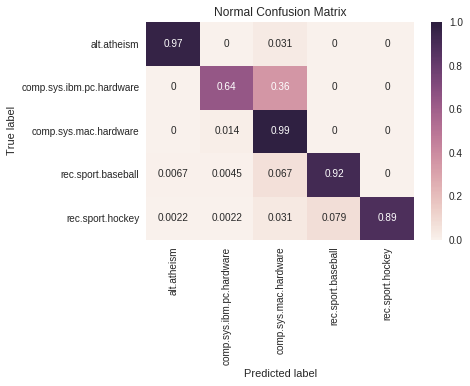

In [14]:
# Your code goes here
# Below function acquired from Lab 2 Data Analysis Visualisation
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
tr_pred = gnb.predict(X=X)
cm = confusion_matrix(y, tr_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(cm_norm, classes=labels, title="Normal Confusion Matrix")

### ========== Question 2.5  ==========

Comment on the confusion matrix from the previous question. Does it look like what you would have expected? Explain.

The obvious attributes of the matrix make sense: the accuracy score that I calculated in 2.3 was about .88 which appears to be approximately the average of the boxes along the main diagonal which represent accuracy. Another aspect that makes sense is that the highest errors were 1) When the pc hardware articles were mistakenly predicted as mac hardware articles and 2) When the hockey articles were mistakenly predicted baseball articles. This makes sense because intuitively those pairs classes share lots of similarities.

### ========== Question 2.6 ==========
Fit a Gaussian Naive Bayes model to the original dataset A (including the outliers). Display the classification accuracy on the training dataset.

In [15]:
# Your code goes here
gnbDirty = GaussianNB()
XDirty = frameA.drop("class", axis=1)
yDirty = frameA["class"]
gnbDirty.fit(X=XDirty, y=yDirty)
print ("Accuracy of prediction on dirty training data using dirty training data:", gnbDirty.score(XDirty, yDirty))

Accuracy of prediction on dirty training data using dirty training data: 0.205260685768


### ========== Question 2.7 ==========
Comment on the above results (Questions 2.3 & 2.6). In particular explain why you think that cleaning the data helps in this case.

The accuracy of GaussianNB classifier on the dirty data is significantly lower than that on the cleaned data. This is most likely because development of the GaussianNB classifier depends on the assumption that the variables are normally distributed, with the classifier generating the means and variances of the variables. Outliers heavily skew these important parameters, i.e. causes the classifer to place too much weight on variables that are not representative of the dataset.

### ========== Question 2.8 ==========

Now we want to evaluate the generalisation of the classifier on new (i.e. unseen data). Use the classifier you trained in Question 2.5 (i.e. on the cleaned dataset) and test its performance on dataset `train_20news_partB`. 

Display the (normalized) confusion matrix and the classification accuracy on the Dataset B.

Accuracy score on new test data = 0.828125


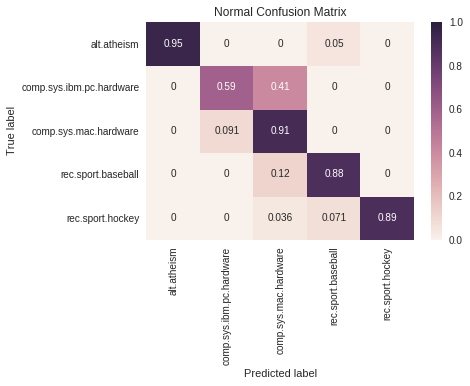

In [16]:
# Your code goes here
XB = frameB.drop("class", axis = 1)
yB = frameB["class"]
print ("Accuracy score on new test data =", gnb.score(XB, yB))
tr_pred_B = gnb.predict(X=XB)
cm_B = confusion_matrix(yB, tr_pred_B)
cm_norm_B = cm_B/cm_B.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(cm_norm_B, classes=labels, title="Normal Confusion Matrix")

### ========== Question 2.9 ==========

Comment on the results from the previous question. Do you think this is an acceptable level of performance? Which are the easiest and most difficult classes to predict correctly? 

A: The performance level on the new data is only slightly lower than that on the training data, which makes sense as it was the training data that was used to develop the model (obviously). 

As I explained briefly in my answer to Question 2.5, the easiest class to predict is again the alt.atheism class because it is intuitively the most unique class; words appearing in articles about sports or computers are relatively unlikely to appear in an article about atheism. My guess is that the 0.05 rate of mislabelling atheism articles about baseball concerns the role of religion in sports or quotes from athletes about their religious views. The most difficult classes to predict were the hardware classes as the classifier frequently confused the two. Interestingly, the next largest error arose when baseball articles were mistaken for mac hardware articles, but the reason for that is a mystery to me.

### ========== Question 2.10 ==========
What is a reasonable baseline against which to compare the classiffication performance? *Hint: What is the simplest classiffier you can think of and what would its performance be on this dataset?* 

A: The simplest classifier I can think of is one that finds the class with the most instances in the training data then predicts that class for every test datum -- similar to the method described when discussing the prediction of whether an earthquake will happen tomorrow or whether a given science paper will win the Nobel Prize. If the classes are approximately evenly distributed (i.e. if there are roughly the same number of articles for each class) then the baseline performance accuracy should be approximately 0.2.

### ========== Question 2.11 ==========

Estimate the baseline performance.

In [17]:
# Your code goes here
# Baseline performance on training data
countFrameA = news_A_clean.groupby("class").count()
print ("Training data baseline performance:", \
      countFrameA["w1_aaa"].max()/countFrameA["w1_aaa"].sum())

# Baseline performance on test data
maxOccurences = countFrameA["w1_aaa"].max()
# Isolates class with largest number 
indexFrame = countFrameA[countFrameA["w1_aaa"] == maxOccurences]
# Determines index of largest class
indexList = list(indexFrame.index.values)
largestGroup = indexList[0]
# Calculates accuracy of guessing A's largest class for test data B
countFrameB = frameB.groupby("class").count()
print ("Test data baseline performance:", \
        countFrameB["w1_aaa"].loc[largestGroup]/countFrameB["w1_aaa"].sum())

Training data baseline performance: 0.213467048711
Test data baseline performance: 0.203125


### ========== Question 2.12 ==========

Execute the cell below to get the prediction on the test dataset by using a different classifier which we will be introducing in this class later on. By using this prediction provided below (`rf_prediction`) plot the confusion matrix and display the classification accuracy on the test dataset. *Important: Make sure the test dataset is loaded in a DataFrame called `news_B` otherwise execution will return an error. In that case replace the DataFrame name in the third line.*

Classification accuracy on the test set by using a Random Forest: 0.875


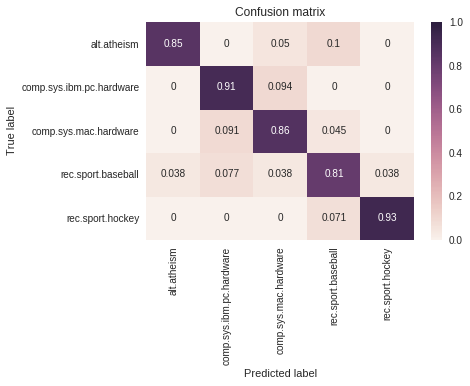

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(n_estimators = 50).fit(X=X, y=y)
X_ts = frameB.drop('class', axis=1)
rf_prediction = rf.predict(X=X_ts)
# Your code goes here
# yB corresponds to the class values from dataset B, i.e. target values in the test data
print('Classification accuracy on the test set by using a Random Forest:', accuracy_score(yB, rf.predict(X=X_ts)))
plt.figure()
cm = confusion_matrix(yB, rf_prediction)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(cm_norm, classes=labels)

### ========== Question 2.13 ==========

Which classifier (Naive Bayes or Random Forest) would you trust if you had to choose? What are the reasons you believe the Gaussian Naive Bayes classifier does not perofm so well in this particular problem? You are not expected to justify the performance level achieved by the Random Forest classifier.

A: Based especially on the accuracy values of ~0.88 (Random Forest) vs. 0.83 (Gaussian Naive Bayes), I would be more inclined to trust the Random Forest classifier over the Gaussian Naive Bayes one. Additionally, somewhat subjectively, my "trust" on the predicted class from one of the classifiers would depend on the class. For instance, if the Naive Bayes classifier predicted an article was about mac then I would probably want to confirm this with another algorithm based on how many pc articles were mislabelled as mac articles in the test data (see decision matrix in 2.8).

The Gaussian Naive Bayes classifier does not perform as well in this particular problem because of the previously explained independence assumption that, as indicated by the joint probability plots, was probably an invalid assumption; the Random Forest classifier does not make this assumption.

Another reason the Gaussian Naive Bayes classifier did not perform as well is that the values (frequencies) of the attributes may not have been normally distributed. After noise were removed, there were only about 6 discrete bins in which the values could fall with the data being heavily skewed towards the lower end. In other words, the Gaussian approximations of the probabilities used on developing the Gaussian Naive Bayes model may not have been the most accurate.